In [86]:
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr


% matplotlib inline

## PWT Data Analysis

**Data & Scope**

* pwt_income_adm1.dta' - from U Chicago - Jingyuan
* pwt90.xlsx  (excel)
* pwt90.dta - direct download from PWT link

**Assumptions/Expectations**
* Has both historical/current estimates to future projection data.
* Has several types of Income (GDP) data: national accounts based, output-based using PPP (current and constant), expenditure-based using PPP (current and constant).
* All GDP values in 2011 millions of USD
* Population data in millions

**Analysis Goals**

**Currently Out of Scope**
Future projection X

**Conclusion**


**Questions**
1. What is a national accounts data sources?
2. Why does U Chicago team use `gdppcna`? (national-accounts based) Confirm with Jingyuan this is true

In [87]:
#os.listdir()
#  'pwt_income_adm1.dta' - from U Chicago - Jingyuan
#   pwt90.xlsx 
#   pwt90.dta - direct download from PWT link
# where wtf99.dta file from?

## Open PWT (raw) Data

In [88]:
pwt9 = pd.read_excel('pwt90.xlsx', sheetname='Data')

### Get variable names

In [89]:
pwt9['year'].unique().min(), pwt9['year'].unique().max()

(1950, 2014)

In [90]:
pwt9.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'cor_exp', 'statcap', 'csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g',
       'pl_x', 'pl_m', 'pl_k'],
      dtype='object')

### GDP analysis

In [91]:
#pwt9.columns
sub_vars = ['countrycode', 'country', 'currency_unit', 'year', 'pop']
gdps = ['rgdpe', 'rgdpo', 'rgdpna', 'cgdpe', 'cgdpo']
gdps_cp = ['rgdpe_pc', 'rgdpo_pc', 'rgdpna_pc', 'cdgec_pc_na', 'rgdpo_pc_pc']
sub_vars.extend(gdps)
print (sub_vars)
pwt9[sub_vars]

for gdp in gdps:
    pc_gdp = gdp + '_pc'
    pwt9[pc_gdp] = pwt9[gdp]/pwt9['pop']
    
#print (pwt9)

['countrycode', 'country', 'currency_unit', 'year', 'pop', 'rgdpe', 'rgdpo', 'rgdpna', 'cgdpe', 'cgdpo']


In [92]:
arr = sub_vars.extend(gdps)
sub_vars

['countrycode',
 'country',
 'currency_unit',
 'year',
 'pop',
 'rgdpe',
 'rgdpo',
 'rgdpna',
 'cgdpe',
 'cgdpo',
 'rgdpe',
 'rgdpo',
 'rgdpna',
 'cgdpe',
 'cgdpo']

In [93]:
pwt9.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'cor_exp', 'statcap', 'csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g',
       'pl_x', 'pl_m', 'pl_k', 'rgdpe_pc', 'rgdpo_pc', 'rgdpna_pc', 'cgdpe_pc',
       'cgdpo_pc'],
      dtype='object')

### Find out if all years occur with same frequency - YES (65 years, each with 182 occurences)

This is expected as any missing year for a country listed is extrapolated or interpolated.

In [94]:
years = pwt9['year']
years.value_counts() 
years.sort_values().value_counts().unique() # 182 only
# all years appear 182 times
years.max() # 2014
years.min() # 1950
#2014- 1950 #~ 64 years span or 65 years total years

# get length of years array
# 11830
years.size == 65*182 # 65 years * freq_of_year 

True

In [95]:
#pwt9['currency_unit'].nunique() # 135 currency
# Note: we are only interested in USD equivalent that is translated into USD via PPP

In [96]:
# Get variables
pwt9.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'cor_exp', 'statcap', 'csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g',
       'pl_x', 'pl_m', 'pl_k', 'rgdpe_pc', 'rgdpo_pc', 'rgdpna_pc', 'cgdpe_pc',
       'cgdpo_pc'],
      dtype='object')

In [97]:
# Manually add per capita (_pc) data for eah GW]
pwt9['rgdpna_pc'] = pwt9['rgdpna'] / pwt9['pop']

pwt9['cdgpo_pc'] = pwt9['cgdpo'] / pwt9['pop']
pwt9['cgdpe_pc'] = pwt9['cgdpe'] / pwt9['pop']

pwt9['rgdpo_pc'] = pwt9['rgdpo'] / pwt9['pop']
pwt9['rgdpe-pc'] = pwt9['rgdpe'] / pwt9['pop']

test = pwt9[['country','year', 'rgdpna_pc']]

### Pivot table (same as WB data shape - years as columns)

In [98]:
df_gdp = pwt9[['country', 'countrycode', 'year', 'pop', 'rgdpe']]
print(df_gdp['pop'].isnull().value_counts())

print(df_gdp['rgdpe'].isnull().value_counts())

False    9439
True     2391
Name: pop, dtype: int64
False    9439
True     2391
Name: rgdpe, dtype: int64


In [99]:
## 12/14 evauation continued...

df_pop = pwt9[['country', 'countrycode', 'year', 'pop']]

pivoted=df_pop.pivot_table(index=['country', 'countrycode'], columns='year', values='pop')
pivoted.to_csv('pwt9_pivoted.csv', sep=',', encoding='utf-8')
reindexed_pop = pivoted.reset_index()

### a) get countries with complete data

In [100]:
countries_with_complete_data = reindexed_pop[~reindexed_pop[1950].isnull()]['country']
countries_with_complete_data_list = countries_with_complete_data.tolist()
len(countries_with_complete_data)

55

In [101]:
print(countries_with_complete_data_list)

['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia (Plurinational State of)', 'Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Cyprus', 'D.R. of the Congo', 'Denmark', 'Ecuador', 'Egypt', 'El Salvador', 'Ethiopia', 'Finland', 'France', 'Germany', 'Guatemala', 'Honduras', 'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kenya', 'Luxembourg', 'Mauritius', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Portugal', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Turkey', 'Uganda', 'United Kingdom', 'United States', 'Uruguay', 'Venezuela (Bolivarian Republic of)']


### Get countries missing data up to 1989

In [102]:
# get countries missing data on 1989
missing_before_1990=reindexed_pop[reindexed_pop[1989].isnull()]

In [103]:
missing_before_1990_list = missing_before_1990[['country', 1989,1990]]['country'].tolist()

print(len(missing_before_1990_list))

25


In [104]:
missing_before_1970=reindexed_pop[reindexed_pop[1969].isnull()]

In [105]:
len(missing_before_1970)-23-2

43

In [106]:
print(sorted(list(set(missing_before_1970['country']) - set(missing_before_1990['country']))))

['Albania', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Bahrain', 'Belize', 'Bermuda', 'Bhutan', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Cayman Islands', 'China, Macao SAR', 'Djibouti', 'Dominica', 'Grenada', 'Hungary', 'Iraq', 'Kuwait', "Lao People's DR", 'Lebanon', 'Maldives', 'Mongolia', 'Montserrat', 'Oman', 'Poland', 'Qatar', 'Saint Kitts and Nevis', 'Saint Lucia', 'Sao Tome and Principe', 'Saudi Arabia', 'St. Vincent and the Grenadines', 'State of Palestine', 'Sudan (Former)', 'Suriname', 'Swaziland', 'Turks and Caicos Islands', 'United Arab Emirates', 'Viet Nam', 'Yemen']


In [107]:
missing_before_1970_list = missing_before_1970[['country', 1969,1970]]['country'].tolist()
print(missing_before_1970_list)

['Albania', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Belarus', 'Belize', 'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Cayman Islands', 'China, Macao SAR', 'Croatia', 'Curaçao', 'Czech Republic', 'Djibouti', 'Dominica', 'Estonia', 'Georgia', 'Grenada', 'Hungary', 'Iraq', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', "Lao People's DR", 'Latvia', 'Lebanon', 'Lithuania', 'Maldives', 'Mongolia', 'Montenegro', 'Montserrat', 'Oman', 'Poland', 'Qatar', 'Republic of Moldova', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Sao Tome and Principe', 'Saudi Arabia', 'Serbia', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'St. Vincent and the Grenadines', 'State of Palestine', 'Sudan (Former)', 'Suriname', 'Swaziland', 'TFYR of Macedonia', 'Tajikistan', 'Turkmenistan', 'Turks and Caicos Islands', 'Ukraine', 'United Arab Emirates', 'Uzbekistan', 'Viet Na

In [108]:
missing_before_1960=reindexed_pop[reindexed_pop[1959].isnull()]

In [109]:
not_missing_1959=reindexed_pop[~reindexed_pop[1959].isnull()]

In [110]:
len(not_missing_1959)

75

In [111]:
print(sorted(set(not_missing_1959['country']) - set(countries_with_complete_data)))

['Bangladesh', 'Benin', 'Burkina Faso', 'Chile', 'China', 'Dominican Republic', 'Ghana', 'Greece', 'Guinea', 'Iran (Islamic Republic of)', 'Jamaica', 'Jordan', 'Malawi', 'Malaysia', 'Malta', 'Paraguay', 'Republic of Korea', 'Taiwan', 'Zambia', 'Zimbabwe']


In [112]:
len(missing_before_1960) - 43-23-2

print(sorted(list(set(missing_before_1960['country']) - set(missing_before_1970['country']))))

['Algeria', 'Barbados', 'Botswana', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'China, Hong Kong SAR', 'Comoros', 'Congo', "Côte d'Ivoire", 'Equatorial Guinea', 'Fiji', 'Gabon', 'Gambia', 'Guinea-Bissau', 'Haiti', 'Indonesia', 'Lesotho', 'Liberia', 'Madagascar', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Romania', 'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone', 'Singapore', 'Syrian Arab Republic', 'Togo', 'Tunisia', 'U.R. of Tanzania: Mainland']


In [113]:
#pivoted.loc['Republic of Korea']

### GET GDP missing country-year


In [114]:
pwt9.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'cor_exp', 'statcap', 'csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g',
       'pl_x', 'pl_m', 'pl_k', 'rgdpe_pc', 'rgdpo_pc', 'rgdpna_pc', 'cgdpe_pc',
       'cgdpo_pc', 'cdgpo_pc', 'rgdpe-pc'],
      dtype='object')

In [115]:
list_of_cols = ['countrycode', 'country', 'year', 'rgdpe', 'rgdpna', 'rgdpo']
pwt_gdp = pwt9[list_of_cols]
pwt_gdp.head(3)

,countrycode,country,year,rgdpe,rgdpna,rgdpo
0,ABW,Aruba,1950,NaN,NaN,NaN
1,ABW,Aruba,1951,NaN,NaN,NaN
2,ABW,Aruba,1952,NaN,NaN,NaN


In [116]:
print(pwt_gdp['rgdpe'].isnull().value_counts())  # same number as pop

False    9439
True     2391
Name: rgdpe, dtype: int64


In [117]:
pivoted_rgdpe=pwt_gdp.pivot_table(index='country', columns='year', values='rgdpe')
pivoted_rgdpe.to_csv('pwt9_rgdpe_pivoted.csv', sep=',', encoding='utf-8')
reindexed_rgdpe = pivoted_rgdpe.reset_index()

In [118]:
countries_with_complete_data_rgdpe = reindexed_rgdpe[~reindexed_rgdpe[1950].isnull()]['country']
countries_with_complete_data_rgdpe.tolist()
len(countries_with_complete_data_rgdpe)

55

In [119]:
missing_before_1990_rgdpe=reindexed_rgdpe[reindexed_rgdpe[1989].isnull()]

In [120]:
missing_before_1990_list2 = missing_before_1990_rgdpe[['country', 1989,1990]]['country'].tolist()

print(len(missing_before_1990_list2))

25


## Open UChicago Data

In [121]:
chicago_data = pd.read_stata('pwt_income_adm1.dta')

In [122]:
chicago_data.shape
chicago_data.columns

Index(['countryname', 'countrycode', 'region', 'year', 'gdppccountry',
       'gdppcstate', 'gdppc_adm0_PWT', 'gdppcstate_rescaled'],
      dtype='object')

In [123]:
china_pwt = pivoted_rgdpe.loc['China']
print(china_pwt.to_dict())

{1950: nan, 1951: nan, 1952: 515462.8125, 1953: 566197.4375, 1954: 578074.5625, 1955: 611264.5625, 1956: 654037.3125, 1957: 710112.625, 1958: 789277.125, 1959: 788445.9375, 1960: 740097.375, 1961: 539199.6875, 1962: 601922.4375, 1963: 668159.3125, 1964: 761998.25, 1965: 828336.5625, 1966: 893297.125, 1967: 859955.75, 1968: 823027.75, 1969: 925836.5625, 1970: 1038634.75, 1971: 1112717.875, 1972: 1113112.0, 1973: 1188522.375, 1974: 1199714.625, 1975: 1259276.375, 1976: 1255957.25, 1977: 1292414.5, 1978: 1459760.25, 1979: 1528231.5, 1980: 1563493.625, 1981: 1628167.75, 1982: 1781943.125, 1983: 1898942.125, 1984: 2123950.0, 1985: 2295097.5, 1986: 2415650.5, 1987: 2600728.0, 1988: 2682387.75, 1989: 2679917.75, 1990: 2755448.0, 1991: 2936986.5, 1992: 3192967.5, 1993: 3483308.0, 1994: 3764241.75, 1995: 4222166.5, 1996: 4362428.5, 1997: 4657996.5, 1998: 4652117.5, 1999: 4925991.5, 2000: 5229666.0, 2001: 5620697.0, 2002: 6249123.0, 2003: 6770642.0, 2004: 7526537.5, 2005: 8356256.0, 2006: 935295

In [124]:
# # Manually add per capita (_pc) data for eah GW]
# Recallt this!
# pwt9['rgdpna_pc'] = pwt9['rgdpna'] / pwt9['pop']
# pwt9['rgdpe-pc'] = pwt9['rgdpe'] / pwt9['pop']

In [125]:
# Get country row

def get_country_by_name(_df, _country_name):
    return _df[_df['country'] == _country_name]

In [126]:
df_rgdpe_pc = pwt9[['country','rgdpe-pc']]
df_rgdpna_pc = pwt9[['country','rgdpna_pc']]

china_rgdpe_pc = get_country_by_name(df_rgdpe_pc, 'China')
print(china_rgdpe_pc['rgdpe-pc'].tolist())

[nan, nan, 910.3774635172614, 983.4547428718112, 986.3007636945035, 1022.2934542957586, 1071.909497459037, 1137.9363077847406, 1238.4149777531177, 1222.6546167088175, 1154.1865378946632, 848.6992572632706, 934.9062446432222, 1005.5449621300505, 1110.8254260958108, 1174.6557247449136, 1231.7327360393058, 1155.278374941148, 1075.991559258536, 1176.3175982044324, 1284.6270720966934, 1341.6458855363499, 1309.8702403291554, 1366.9428298098057, 1350.828026712101, 1390.5737275499584, 1362.670425164031, 1379.9671889681374, 1535.7211378162021, 1585.0472393253012, 1598.930018667019, 1642.0366725244123, 1772.4982369793859, 1862.2584730255678, 2051.474341036538, 2180.3616170398655, 2253.7522625626207, 2380.2093642637046, 2407.5383021603166, 2360.8947438103432, 2386.4838236868923, 2505.260407828704, 2686.6648823092364, 2895.5588984217984, 3095.422932128964, 3438.690786289014, 3523.1026622105633, 3734.5859728847063, 3706.091160532545, 3901.115265601892, 4117.929693477359, 4400.834909616224, 4865.592

In [127]:
china_rgdpna_pc = get_country_by_name(df_rgdpna_pc, 'China')
print(china_rgdpna_pc['rgdpna_pc'].tolist())

[nan, nan, 819.4801801744848, 883.3232423348202, 887.0476960736373, 909.831937317056, 969.3167914560682, 1027.6427985306, 1127.45443597709, 1143.881514014429, 1099.0458056404734, 776.9543602229973, 834.2620542382895, 910.1780119632682, 1008.247678408987, 1072.423318442779, 1119.323404422334, 1030.2588998802494, 962.3970576204317, 1048.7136036691477, 1149.7906552785528, 1177.0089595136724, 1175.1817195307954, 1226.0652600863177, 1221.4751810061875, 1275.1452743659897, 1210.1751180173244, 1254.0253743307462, 1374.1354249219867, 1450.2314148236237, 1488.6673140892124, 1554.5324720842766, 1667.8104486066263, 1759.9342295770327, 1931.8450481244906, 2079.793503541313, 2166.7174090862263, 2292.1518553124974, 2356.740259568621, 2338.4988115468127, 2310.8144895790333, 2417.4600952555566, 2611.265216708936, 2857.8224950826507, 3063.5050778776035, 3443.1604193636817, 3541.382312457623, 3763.4272126558385, 3754.6280178007, 3953.862378890208, 4181.044342988625, 4446.292950425033, 4898.048276310191,

In [128]:
china = chicago_data[chicago_data['countryname']=='China']
china.groupby('year').mean()

,gdppccountry,gdppcstate,gdppc_adm0_PWT,gdppcstate_rescaled
year,,,,
1952,NaN,NaN,819.480164,NaN
1953,NaN,NaN,883.323242,NaN
1954,NaN,NaN,887.047668,NaN
1955,575.902222,851.882446,909.831909,1345.835815
1956,NaN,NaN,969.316772,1433.826660
1957,NaN,NaN,1027.642822,1520.103394
1958,NaN,NaN,1127.454468,1667.746216
1959,NaN,NaN,1143.881470,1692.045166
1960,771.659729,1247.902954,1099.045776,1777.341064


In [129]:
# df_rgdpe_pc = pwt9[['country','rgdpe-pc']]
# # df_rgdpna_pc = pwt9[['country','rgdpna_pc']]

# china_rgdpe_pc = get_country_by_name(df_rgdpe_pc, 'China')
# print(china_rgdpe_pc['rgdpe-pc'].tolist())
# china = chicago_data[chicago_data['countryname']=='China']
# china.groupby('year').mean()

In [130]:
[cc for cc in df_rgdpe_pc['country'].unique().tolist() if cc.startswith('U')]

['United Arab Emirates',
 'United Kingdom',
 'U.R. of Tanzania: Mainland',
 'Uganda',
 'Ukraine',
 'Uruguay',
 'United States',
 'Uzbekistan']

In [131]:
[cc for cc in chicago_data['countryname'].unique().tolist() if cc.startswith('U')]

['United Arab Emirates',
 'United Kingdom',
 'Ukraine',
 'Uruguay',
 'United States',
 'Uzbekistan']

In [132]:
#pwt
usa_rgdpe_pc = get_country_by_name(df_rgdpe_pc, 'United States')
usa_rgpdna_pc = get_country_by_name(df_rgdpna_pc, 'United States')
usa_uchic = chicago_data[chicago_data['countryname']=='United States']

In [133]:
na = usa_uchic.groupby('year').mean()['gdppc_adm0_PWT'].tolist()

In [134]:
pe = usa_rgdpe_pc['rgdpe-pc'].tolist()

In [135]:
na[0]

14490.9404296875

In [136]:
pe[0]

14655.01942630272

In [137]:
len(pe)

65

In [138]:
#[pe[i]-na[i] for i in range(65)]

## Mike's Code

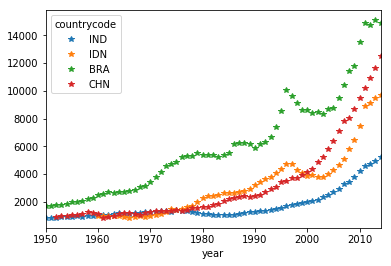

In [139]:
pwt9.set_index(['countrycode', 'year']).unstack('year')['rgdpe_pc'].loc[['IND', 'IDN', 'BRA', 'CHN']].T.plot(style='*')

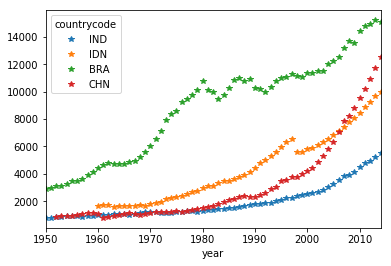

In [140]:
pwt9.set_index(['countrycode', 'year']).unstack('year')['rgdpna_pc'].loc[['IND', 'IDN', 'BRA', 'CHN']].T.plot(style='*')